In [171]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.ndimage.measurements import center_of_mass

695 863


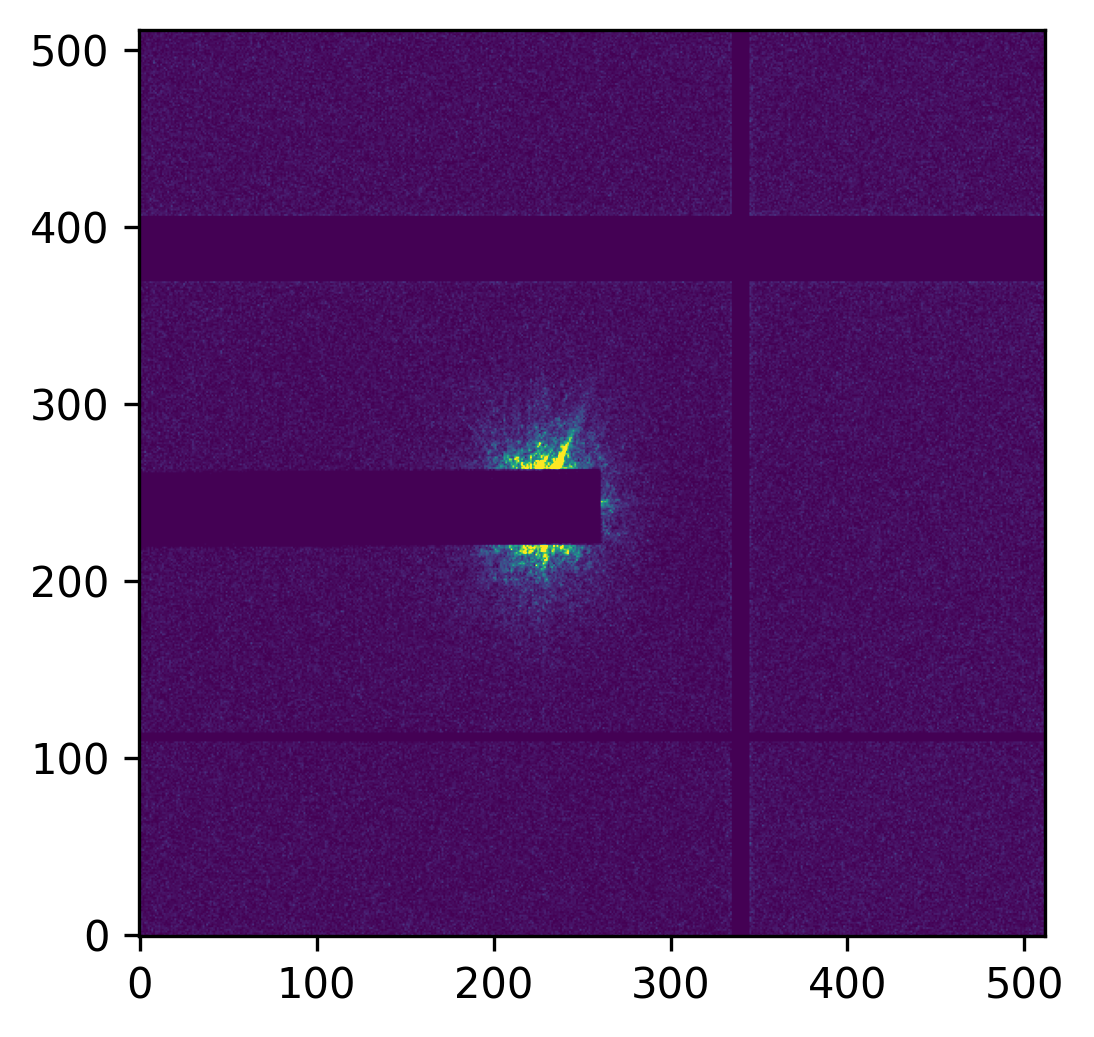

In [421]:
x = np.load('images_chx/7dafd6f7_image_no_maks_10.npy')

# transformation of CHX data
x[x>2000] = 0
x[255:260, :] = 0
x[805:810, :] = 0
x[1357:1361, :] = 0
x[1908:1912, :] = 0
x[920:950, 1150:] = 0

x_c, y_c = center_of_mass(x)

# add a random dispacement if needed
# maybe, leave it for later for data augmentation
# x_c += np.random.randint(-100, 100)
# y_c += np.random.randint(-100, 100

size = 512
x_c = np.max(int(x_c)-size//2, 0)
y_c = np.max(int(y_c)-size//2, 0)
print(x_c, y_c)
plt.figure(dpi = 300)
cropped_x = x[x_c:x_c+size, y_c:y_c+size]
plt.imshow(cropped_x , vmin = 0, vmax =5, origin = 'lower')

In [418]:
def resize(x, n):
    xr = np.zeros((x.shape[0]//n,x.shape[1]//n ))
    for j in range(0, x.shape[0]-n, n):
        for i in range(0, x.shape[1]-n, n):
            xr[j//n, i//n] = np.nanmean(x[j:j+n, i:i+n])
    return xr

# I haven't checked it yet. But the idea should be to selec the nearest label
# that is not a background
def resize_target(x, n): 
    xr = np.zeros((x.shape[0]//n,x.shape[1]//n ))
    for j in range(0, x.shape[0]-n, n):
        for i in range(0, x.shape[1]-n, n):
            xr[j//n, i//n] = np.nanmax(x[j:j+n, i:i+n])
    return xr

In [419]:
y = resize(cropped_x, 2)
y_smooth = gaussian_filter(y, sigma=2)
y = gaussian_filter(y, sigma=0.3)
y = (y - y_smooth.min())/(y_smooth.max() - y_smooth.min())

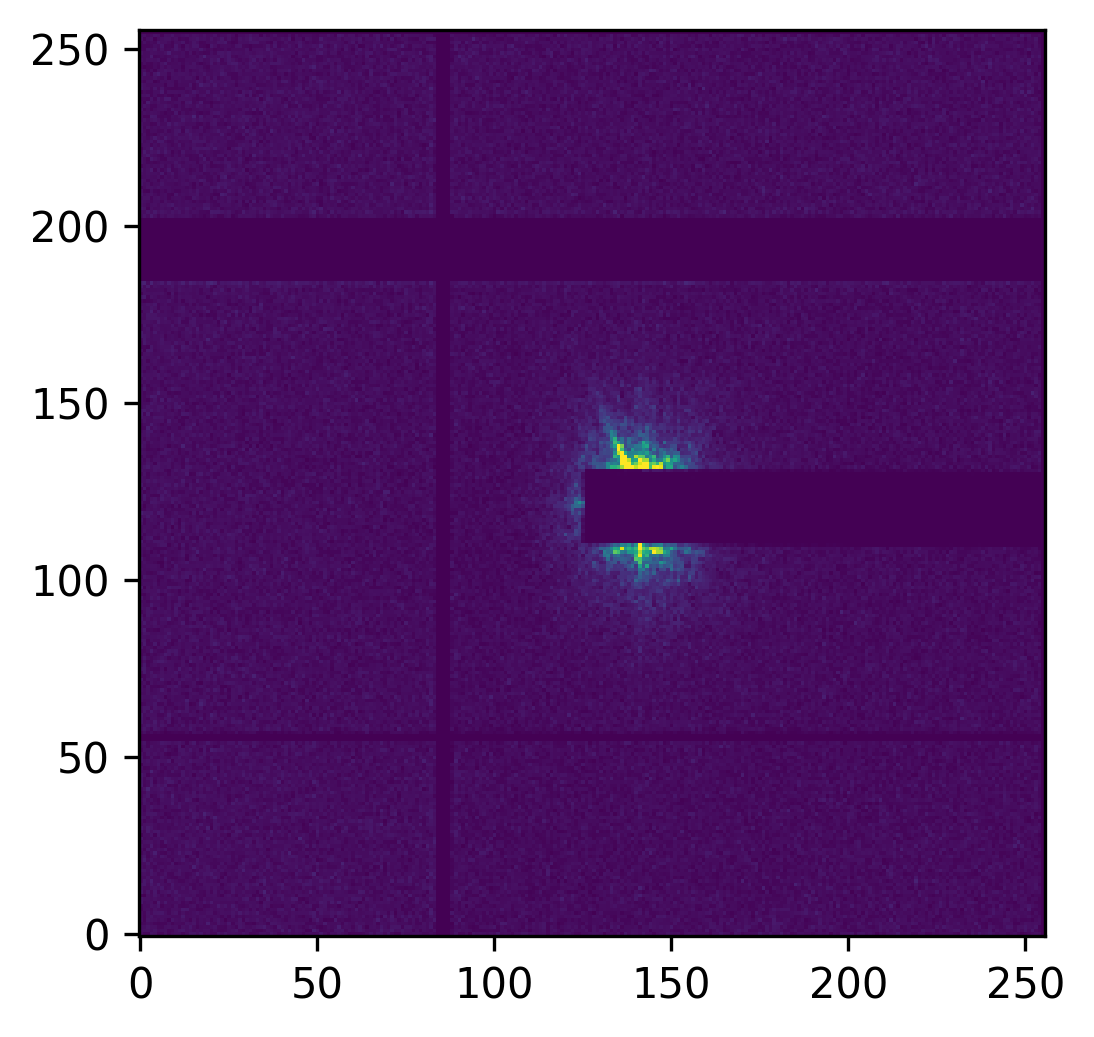

In [420]:
plt.figure(dpi = 300)
plt.imshow(y, vmin = 0, vmax=1, origin = 'lower')

In [ ]:
# Additional modifications: mirrow-flips
# x -> x[::-1, :]
# x -> x[:, ::-1]
# x -> X[::-1, ::-1]